<a href="https://colab.research.google.com/github/mfWesterhouse/Project117/blob/main/project117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving project117_data.csv to project117_data.csv


In [2]:
import pandas as pd

df = pd.read_csv("project117_data.csv")

In [3]:
from sklearn.model_selection import train_test_split

factors = df[["variance", "skewness", "curtosis", "entropy"]]
output = df["class"]

factors_train, factors_test, output_train, output_test = train_test_split(factors, output, test_size = 0.25, random_state = 0)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

factors_train = ss.fit_transform(factors_train)
factors_test = ss.fit_transform(factors_test)

classifier = LogisticRegression(random_state = 0)
classifier.fit(factors_train, output_train)

LogisticRegression(random_state=0)

In [7]:
output_prediction = classifier.predict(factors_test)

predicted_values = []
for i in output_prediction:
  if i == 0:
    predicted_values.append("Authorized")
  else:
    predicted_values.append("Forged")

actual_values = []
for i in output_test.ravel():
  if i == 0:
    actual_values.append("Authorized")
  else:
    actual_values.append("Forged")

[Text(0, 0.5, 'Authorized'), Text(0, 1.5, 'Forged')]

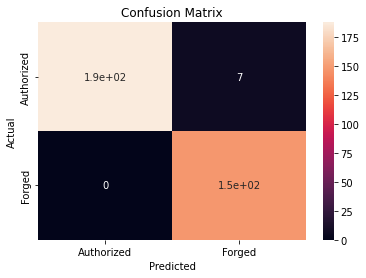

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels = ["Authorized", "Forged"]

cm = confusion_matrix(actual_values, predicted_values)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

In [10]:
tn = 1.5e+02
fn = 7
fp = 0
tp = 1.9e+02
accuracy = (tn + tp)*100/(tp+tn+fp+fn)
print(accuracy)

97.98270893371757
